In [1]:
from TimeDelay_Neuron_DDF_GaussianForm import *
import numpy as np
import time
import matplotlib.pyplot as plt
import random
import copy
random.seed()
np.random.seed()

In [2]:
# modify this
use_neuron_index = 3
neuron_txt_filename = 'Episode_2_voltage.txt'
epoch = None # also called "episode". set to None if not specified

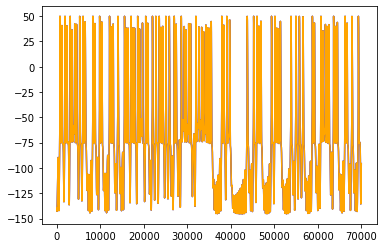

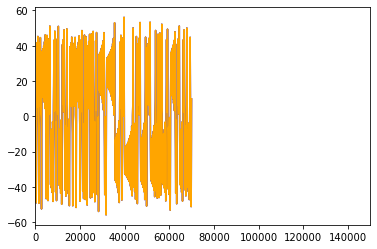

In [3]:
# ======== do not modify below ==========
neuron_name_list = ['Neuron_52_6-8-16',
                    'Neuron_57_6-8-16',
                    'Neuron_61_6-8-16',
                    'Neuron_8-15-2019']
directories_list = ['HVC_ra_x_i_data_2016_2019/50 KhZ Recordings - 06_08_16/50KhZ-06_08_16/50KhZ-06_08_16/Neuron 52/',
                   'HVC_ra_x_i_data_2016_2019/50 KhZ Recordings - 06_08_16/50KhZ-06_08_16/50KhZ-06_08_16/Neuron 57/',
                   'HVC_ra_x_i_data_2016_2019/50 KhZ Recordings - 06_08_16/50KhZ-06_08_16/50KhZ-06_08_16/Neuron 61/',
                   'HVC_ra_x_i_data_2016_2019/08-15-2019/']

# Voltage_train = np.loadtxt(directories_list[use_neuron_index]+'Episode_2_voltage.txt')
# Current_train = np.loadtxt(directories_list[use_neuron_index]+'Episode_2_current.txt')
# Voltage_test = np.loadtxt(directories_list[use_neuron_index]+'Episode_2_voltage.txt')
# Current_test = np.loadtxt(directories_list[use_neuron_index]+'Episode_2_current.txt')
Voltage_train = np.load('Example/NaKL_L63_X_Driven_70k_h=02.npy')[0]
Current_train = np.load('Example/NaKL_L63_X_Driven_70k_h=02.npy')[4]
Voltage_test = np.load('Example/NaKL_L63_X_Driven_70k_h=02.npy')[0]
Current_test = np.load('Example/NaKL_L63_X_Driven_70k_h=02.npy')[4]

plt.figure()
plt.plot(Voltage_train, color='blue')
plt.plot(Voltage_test, color='orange')
plt.show()
plt.figure()
plt.plot(Current_train, color='blue')
plt.plot(Current_test, color='orange')
plt.xlim((0,150000))
plt.show()

C_km:(5000, 3)
temp_arry:[-100. -100. -100. ... -100. -100. -100.]


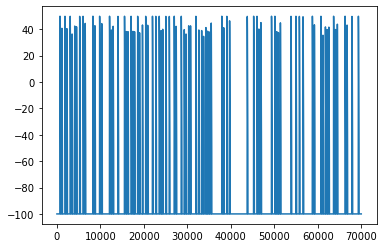

C_at:(1000, 3)
5000
Centers:(5000, 3)


In [4]:
tau = 3
D = 3
length = 60000
Xdata = Voltage_train
TT = 0.02
NoCenters_no_thresh = 5000
NoCenters_above_thresh = 1000
DDF = Gauss()
# Combine centers above threshold with centers determined by kmeans
Centers_k_means = DDF.KmeanCenter(Xdata,NoCenters_no_thresh,D,length,tau);
temp_array = copy.deepcopy(Xdata)
temp_array[temp_array<-50]=-100
Centers_above_thresh = DDF.KmeanCenter(temp_array,NoCenters_above_thresh,D,length,tau);
# Center = np.concatenate((Centers_k_means,Centers_above_thresh),axis=0)
Center = Centers_k_means

print("C_km:"+str(Centers_k_means.shape))
# times_where_V_gt_n75 = train_t_ind_arr[V_Train_delayed[0]>=-40]
# V_Train_delayed_add = V_Train_delayed[:,(times_where_V_gt_n75-train_t_ind_arr[0])] # important to subtract train_t_ind_arr[0] (time training index vs total time index of V delayed array)
# Centers_above_thresh = DDF.KmeanCenter(Xdata[Xdata>-50],100,D,length,tau);


print("temp_arry:"+str(temp_array))
plt.figure()
plt.plot(temp_array)
plt.show()
print("C_at:"+str(Centers_above_thresh.shape))

NoCenters = np.shape(Center)[0]
print(NoCenters)
print("Centers:"+str(Center.shape))
np.savetxt('centers/Center '+neuron_name_list[use_neuron_index]+'.txt',Center)
Center = np.loadtxt('centers/Center '+neuron_name_list[use_neuron_index]+'.txt')
# Center = np.load('Example/Centers_train25k_5k_D'+str(D)+'_tau'+str(tau)+'.npy')

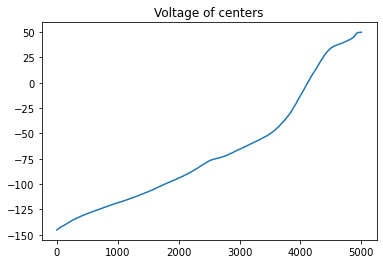

In [5]:
plt.show()
plt.figure()
plt.plot(np.sort(Center[:,0]))
plt.title("Voltage of centers")
plt.show()

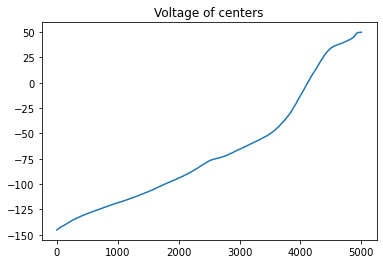

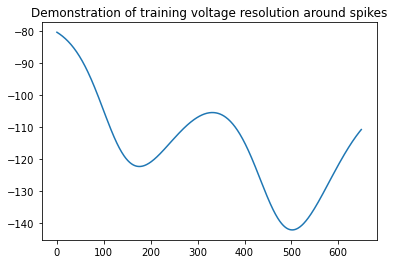

In [6]:
plt.show()
plt.figure()
plt.plot(np.sort(Center[:,0]))
plt.title("Voltage of centers")
plt.show()

plt.show()
plt.figure()
plt.plot(Voltage_train[10550:11200])
plt.title("Demonstration of training voltage resolution around spikes")
plt.show()

In [7]:
stim_train = Current_train
Pdata = Voltage_test
PreLength = 60000
beta_arr,R_arr = [10e0],[10e-9,10e-8,10e-7,10e-6,10e-5,10e-4,10e-3,10e-2,10e-1]#[10e-4,10e-3,10e-2,10e-1,10e0,10e1,10e2],[10e-4,10e-3,10e-2,10e-1,10e0,10e1,10e2]#,[10e-3,10e-2,10e-1,10e0,10e1,10e2,10e3]
bias = 50 # should be larger than tau*(D-1) or something like that
X = np.arange(bias,bias+PreLength*TT,TT)
stim_test = Current_test

In [8]:
if ' ': print("hi")

hi


1e-08
1e-07
1e-06
1e-05
0.0001
0.001
0.01
0.1
1.0


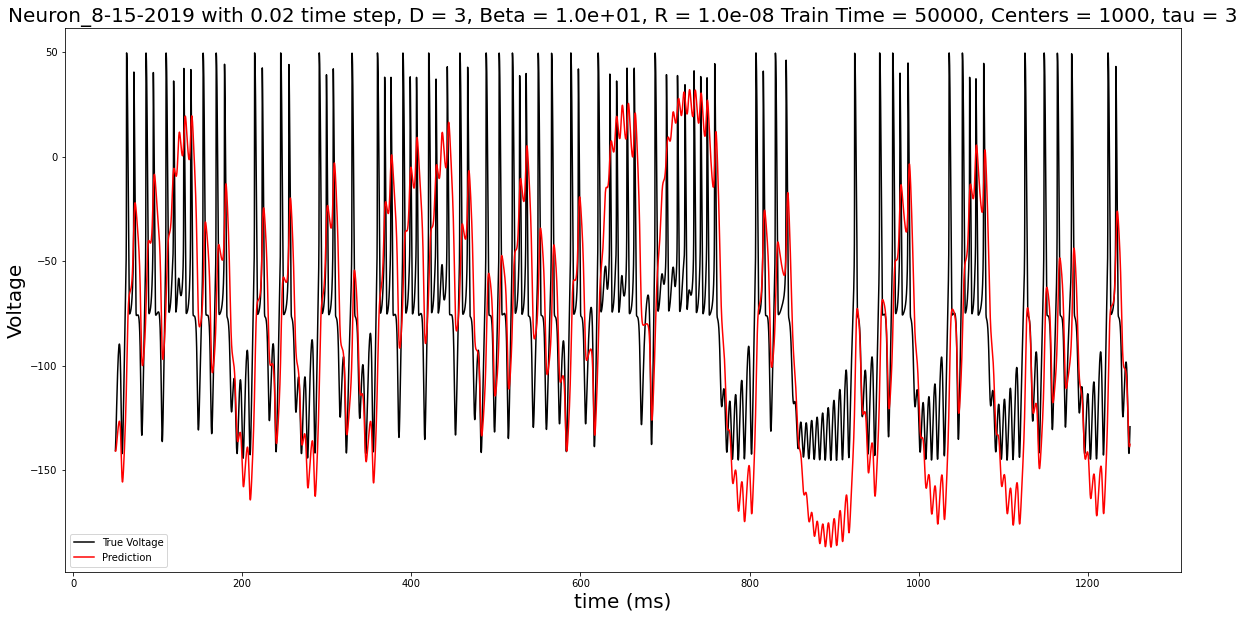

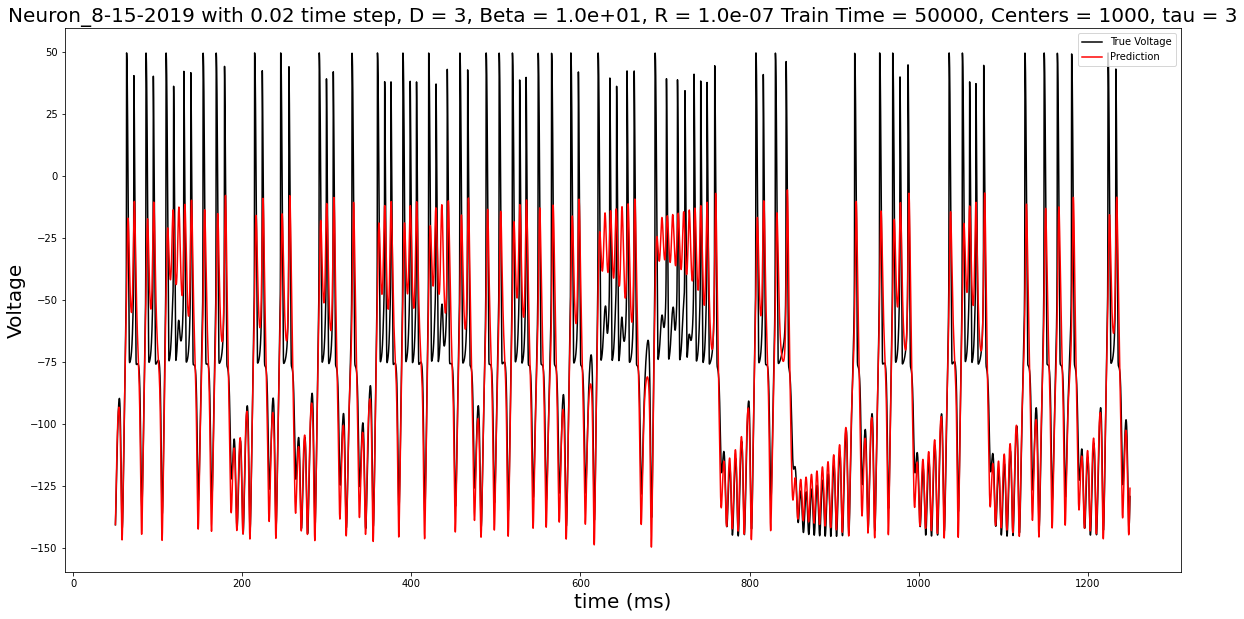

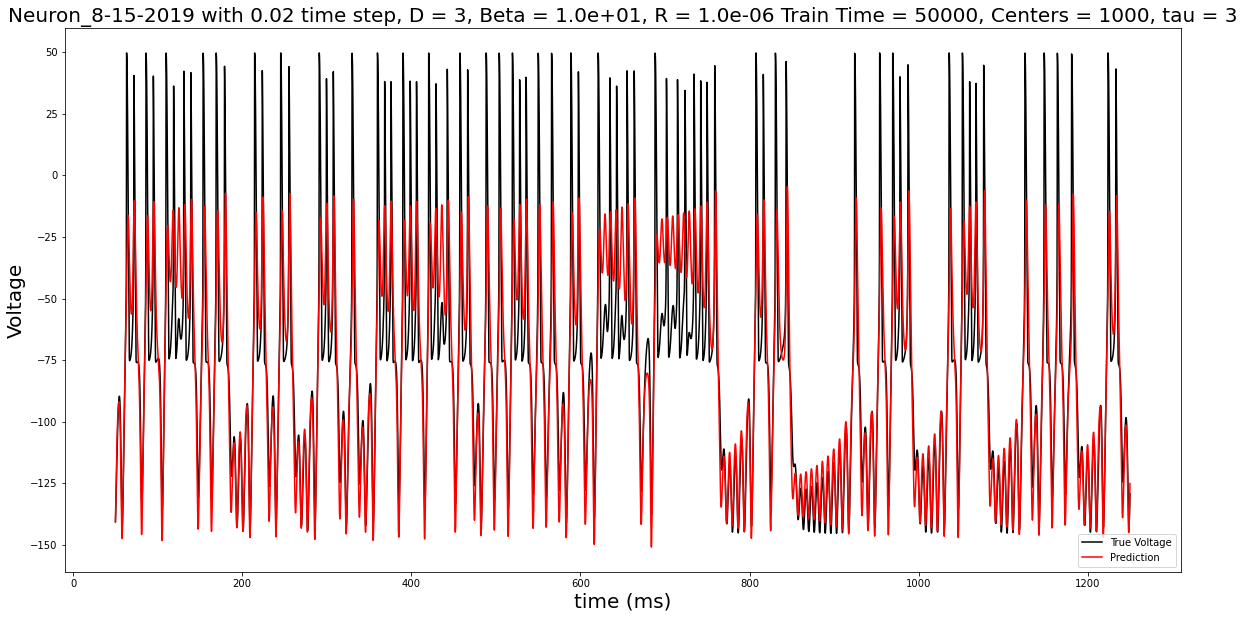

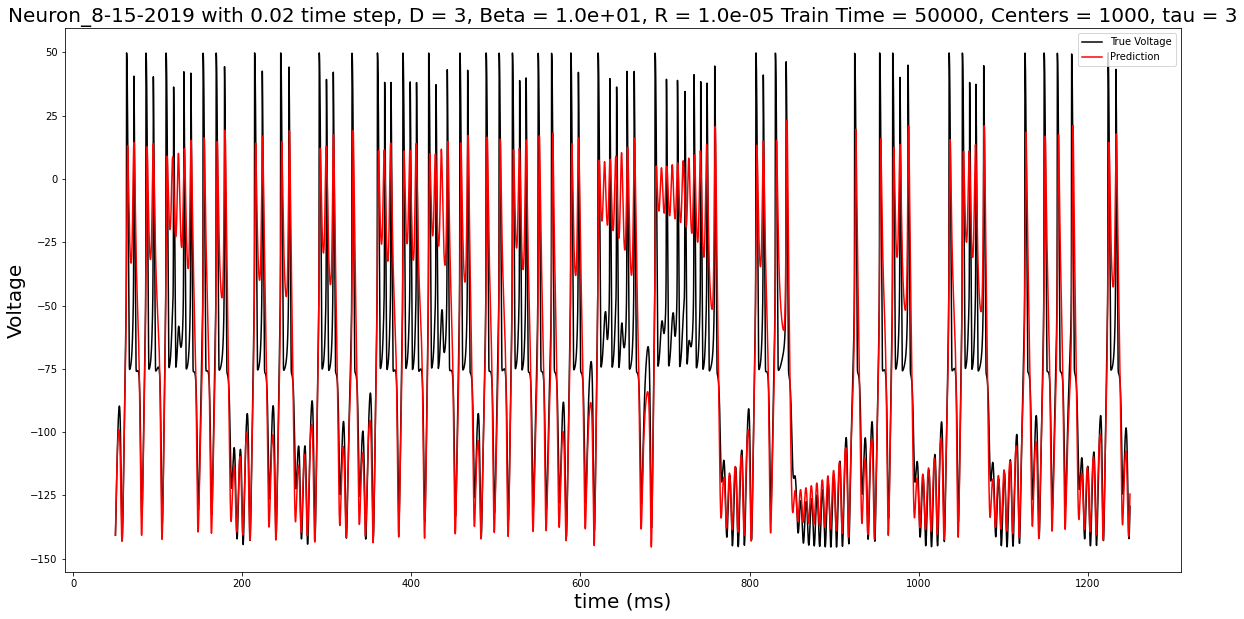

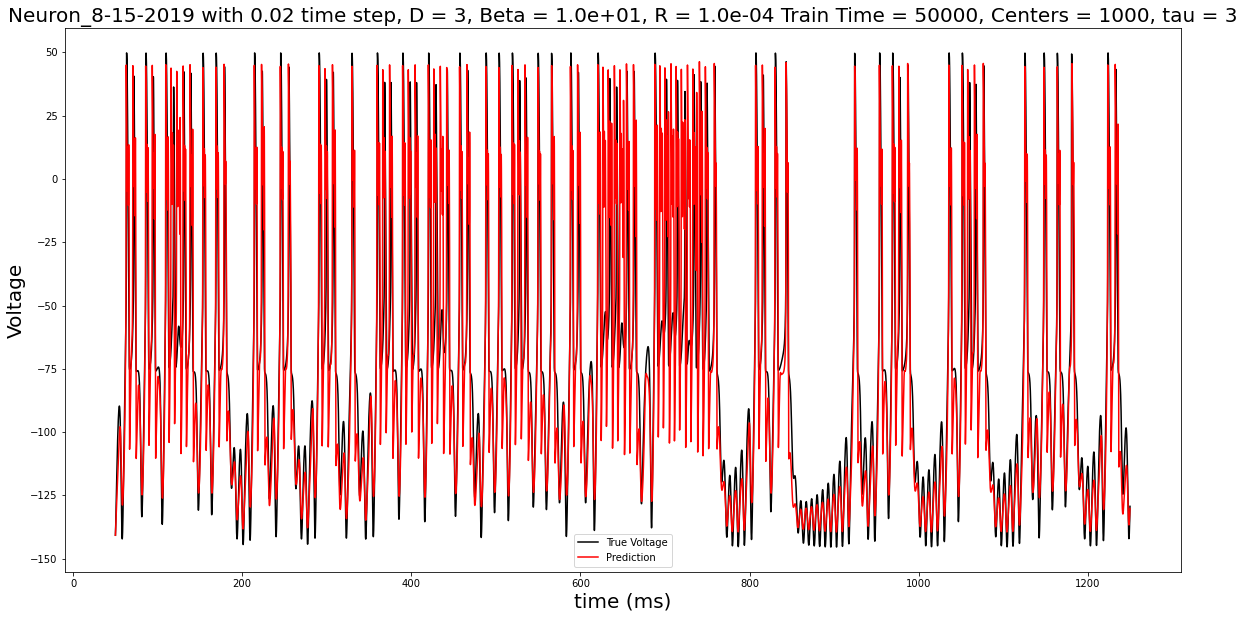

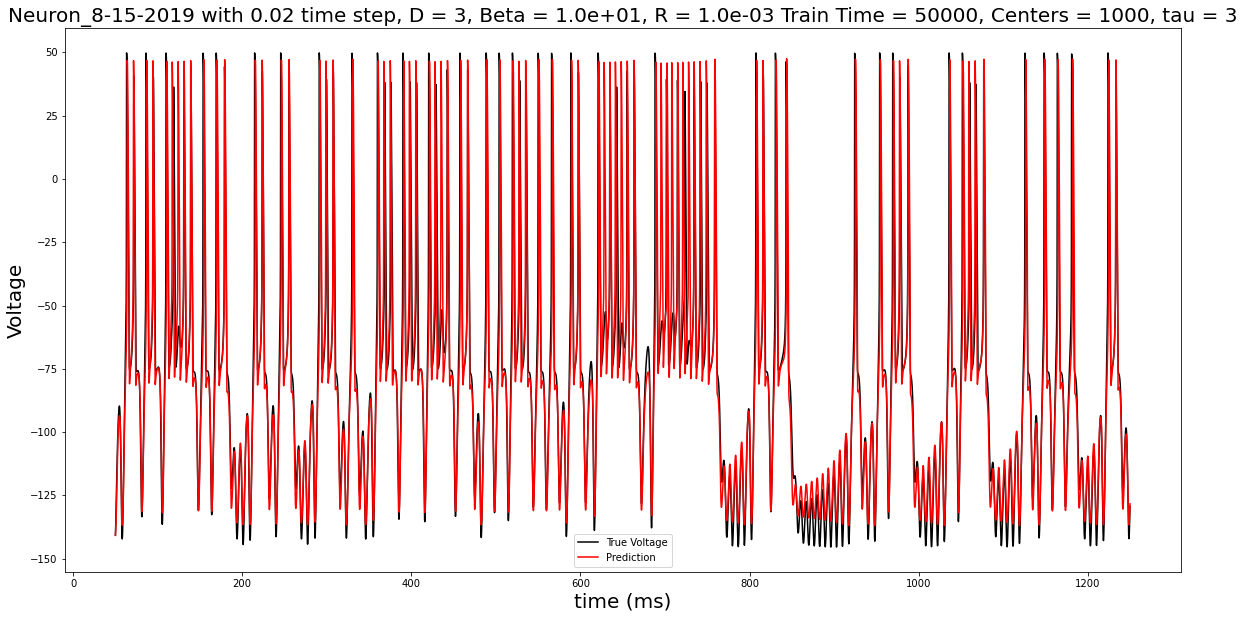

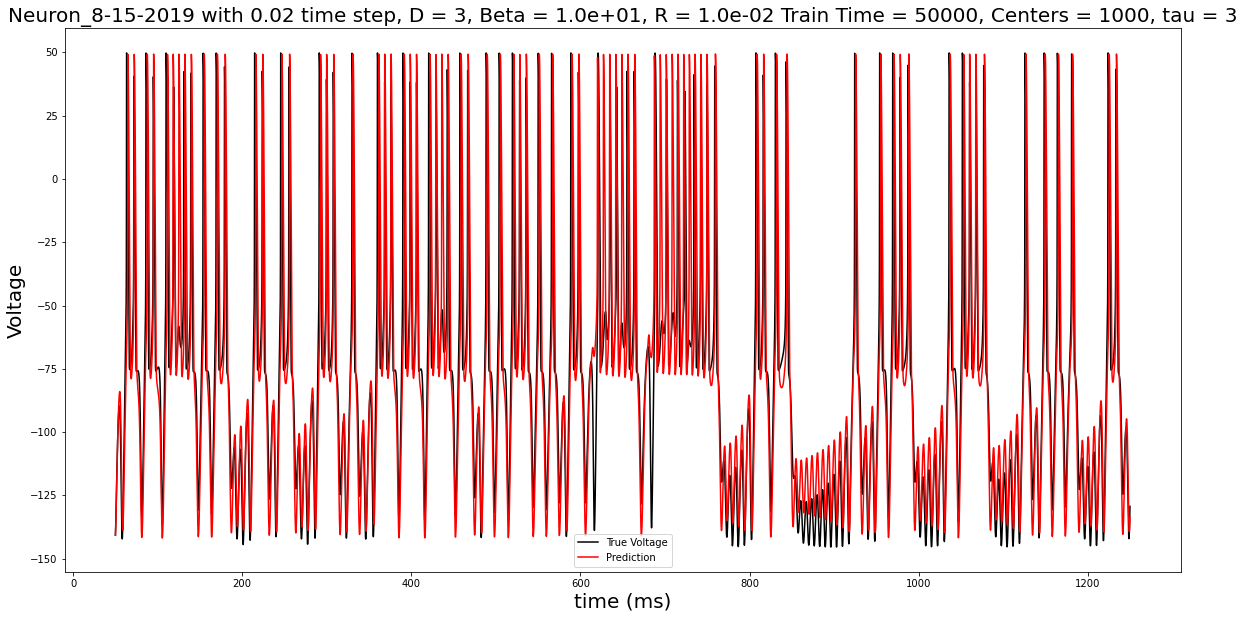

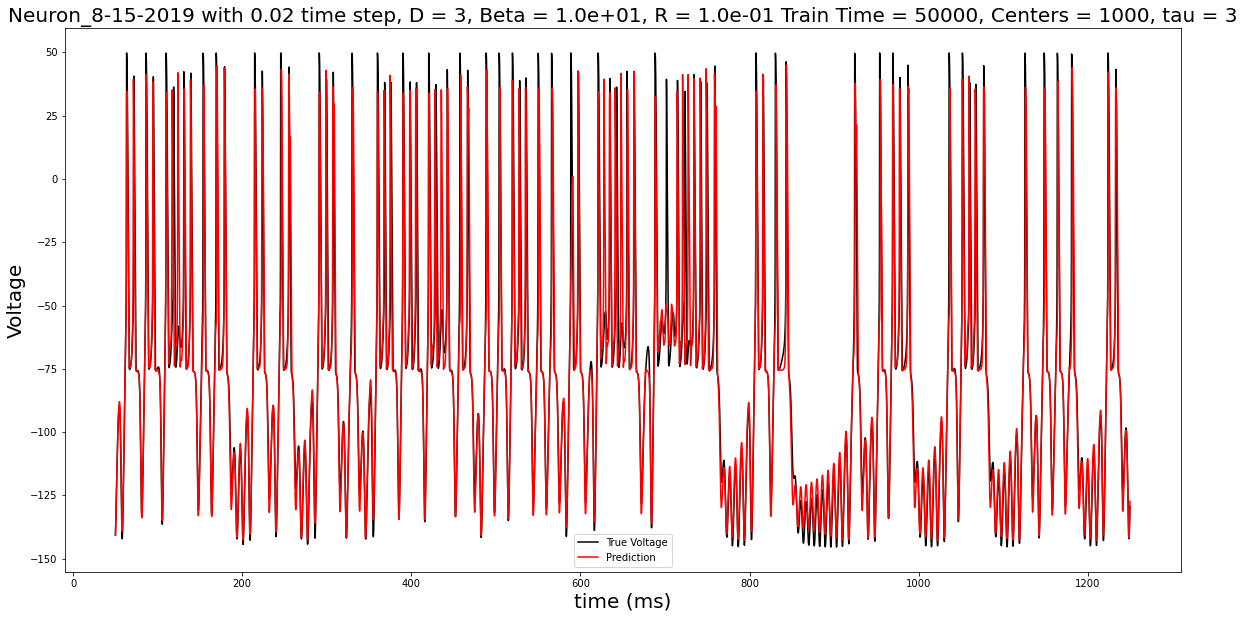

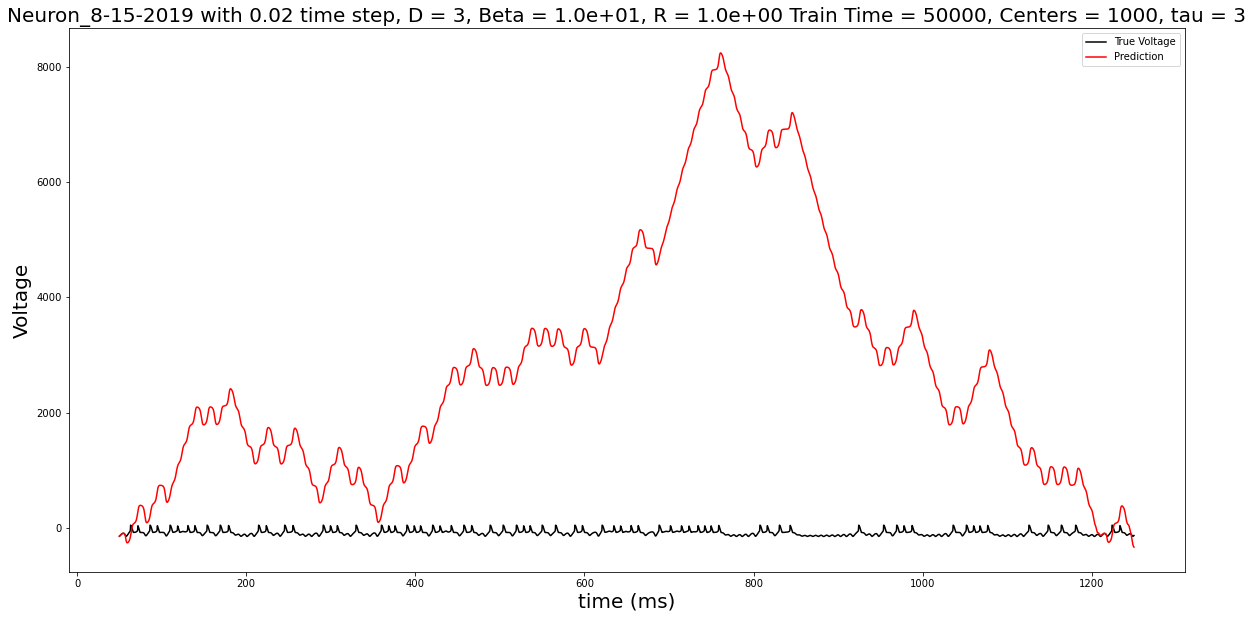

In [9]:
for beta in beta_arr:
    for R in R_arr:
        # beta = 10e0
        # R = 10e-4
        title = neuron_name_list[use_neuron_index]+' with 0.02 time step, D = 3, Beta = '+str("{:.1e}".format(beta))+', R = '+str("{:.1e}".format(R))+' Train Time = 50000, Centers = 1000, tau = '+str(tau)
        print(R)
        F = DDF.FuncApproxF(Xdata,length,Center,beta,R,D,stim_train,tau)
        PredValidation = DDF.PredictIntoTheFuture(F,PreLength,stim_test[bias-1:],Pdata[bias-1-(D-1)*tau:])
        # Tau8
        plt.figure(figsize=(20,10))
        plt.plot(X,Pdata[bias:bias + PreLength],label = 'True Voltage', color = 'black')
        plt.plot(X,PredValidation[tau*(D-1)+1:tau*(D-1)+PreLength+1],label = 'Prediction', color = 'r')
        plt.xlabel('time (ms)',fontsize=20)
        plt.ylabel('Voltage',fontsize=20)
        plt.legend()
        plt.title(title,fontsize=20)
        #plt.savefig('Validation Prediction Result')
        plt.savefig(title+'.png')
        plt.show

0.01


<function matplotlib.pyplot.show(close=None, block=None)>

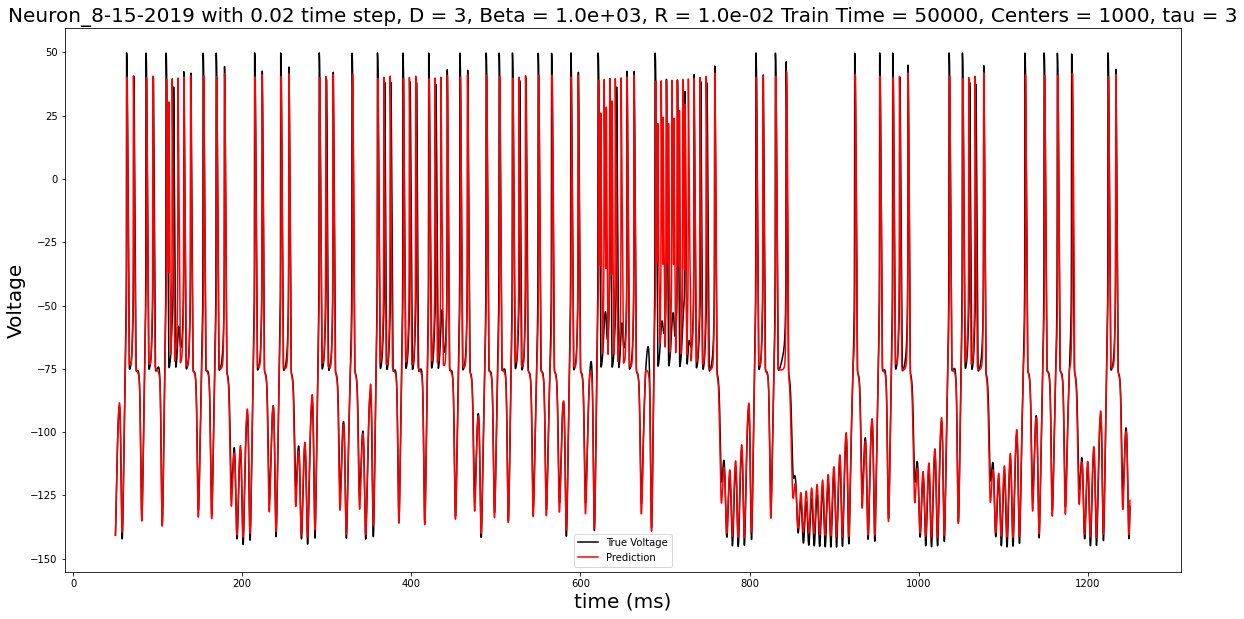

In [10]:
beta = 10e2
R = 10e-3
title = neuron_name_list[use_neuron_index]+' with 0.02 time step, D = 3, Beta = '+str("{:.1e}".format(beta))+', R = '+str("{:.1e}".format(R))+' Train Time = 50000, Centers = 1000, tau = '+str(tau)
print(R)
F = DDF.FuncApproxF(Xdata,length,Center,beta,R,D,stim_train,tau)
PredValidation = DDF.PredictIntoTheFuture(F,PreLength,stim_test[bias-1:],Pdata[bias-1-(D-1)*tau:])
# Tau8
plt.figure(figsize=(20,10))
plt.plot(X,Pdata[bias:bias + PreLength],label = 'True Voltage', color = 'black')
plt.plot(X,PredValidation[tau*(D-1)+1:tau*(D-1)+PreLength+1],label = 'Prediction', color = 'r')
plt.xlabel('time (ms)',fontsize=20)
plt.ylabel('Voltage',fontsize=20)
plt.legend()
plt.title(title,fontsize=20)
#plt.savefig('Validation Prediction Result')
plt.savefig(title+'.png')
plt.show

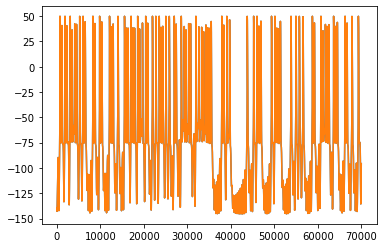

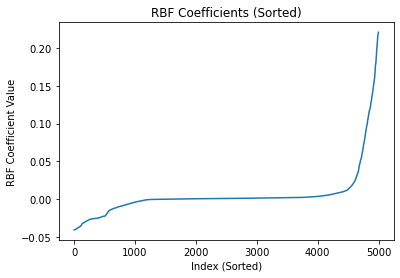

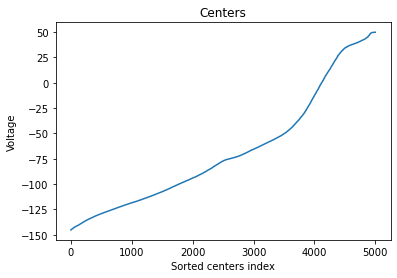

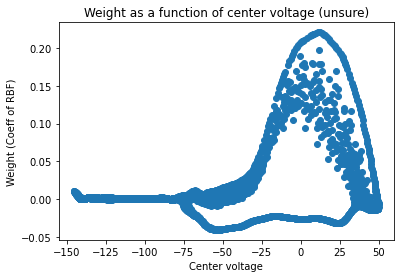

In [11]:
plt.plot(Voltage_train[:100000])
plt.plot(Pdata[0:180000])
plt.show()
plt.figure()
plt.plot(np.sort(DDF.W))
plt.title("RBF Coefficients (Sorted)")
plt.xlabel('Index (Sorted)')
plt.ylabel("RBF Coefficient Value")
plt.show()
plt.figure()
plt.plot(np.sort(Center[:,0]))
plt.title("Centers")
plt.xlabel("Sorted centers index")
plt.ylabel("Voltage")
plt.show()

# plt.show()
# plt.figure()
# color_vals = (np.roll(Center,-1)-Center)[:,0]
# plt.title("Sorted color values")
# color_vals[color_vals<-20] = 0
# color_vals[color_vals>5] = 0
# plt.plot(np.sort(color_vals))
# plt.show()

plt.scatter(Center[:,0],DDF.W[:-1])
plt.title("Weight as a function of center voltage (unsure)")
plt.xlabel("Center voltage")
plt.ylabel("Weight (Coeff of RBF)")
plt.show()

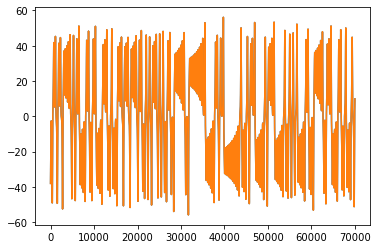

In [12]:
plt.plot(Current_train[:100000])
plt.plot(Current_test[0:180000])

In [13]:
print("{:.1e}".format(15.000002))

1.5e+01
